<a href="https://colab.research.google.com/github/KosukhaOlexandr/iasa_ds_champ/blob/main/iasa_preprocessing_and_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Прогнозування доходів користувачів

##Попередня обробка даних в датасеті

###Завантаження і огляд даних:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

with open('/content/drive/MyDrive/iasa_ds_selection/Task_dataset.csv') as f:
  data = pd.read_csv(f)

In [ ]:
data

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,media_source,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_135,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_2,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_17,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_1,2021-12-03,COUNTRY_203,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467827,11.0,11.0,11.0,11.0,9,9,9,9,10,10,10,10,3,3,3,3,282,282,282,282,254,254,254,254,7,7,7,7,0,0,0,1,1,8,2,2,9,0,0,3,29,29,237,1,1,6,0.0,0.0,0.00000,4.174198,4.174198,4.174198,SOURCE_17,2021-12-30,COUNTRY_141,0.037158,0.037158,0.037158,ios,0.000000,4.174198,0.037158,4.211356
1467828,2.0,3.0,6.0,7.0,5,9,11,13,6,10,12,13,0,0,0,0,346,554,658,732,254,542,658,721,5,9,11,12,1,1,0,3,9,13,4,10,13,0,0,0,174,542,721,3,9,12,0.0,0.0,1.17629,4.899572,7.841280,9.404430,SOURCE_23,2021-12-30,COUNTRY_141,0.039256,0.039256,0.091267,ios,4.705161,10.967580,0.091267,15.764008
1467829,3.0,5.0,11.0,13.0,5,9,15,18,5,10,16,19,0,0,0,0,265,497,857,913,254,496,809,901,4,8,13,16,1,1,0,0,5,13,1,5,14,0,0,0,0,254,685,0,4,12,0.0,0.0,0.00000,4.036153,8.875894,13.928170,SOURCE_23,2021-12-30,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,14.938221,0.000000,14.938221
1467830,5.0,5.0,5.0,5.0,24,24,24,24,24,24,24,24,7,7,7,7,1308,1308,1308,1308,1278,1278,1278,1278,12,12,12,12,0,0,0,9,23,25,10,23,25,4,7,7,524,1249,1295,6,12,12,0.0,0.0,0.00000,7.402224,7.402224,7.402224,SOURCE_4,2021-12-30,COUNTRY_141,0.177550,0.177550,0.177550,ios,0.000000,7.402224,0.177550,7.579774


###Підрахунок і видалення всіх NA

In [ ]:
print(data.isna().sum())
print('All: ', data.isna().sum().sum())

total_sessions_day0       1365
total_sessions_day1       1367
total_sessions_day3       1368
total_sessions_day7       1374
chapters_finished_day0       0
                          ... 
platform                     0
target_sub_ltv_day30         0
target_iap_ltv_day30         0
target_ad_ltv_day30          0
target_full_ltv_day30        0
Length: 63, dtype: int64
All:  5474


In [ ]:
data.dropna(axis = 0, inplace = True)

###Перемішання датасету:

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

###Видаляємо ключову колонку - target_full_ltv_day30, а також три колонки, які в сумі дають її

In [ ]:
target = data.target_full_ltv_day30
data.drop('target_full_ltv_day30', axis = 1, inplace = True)

Також видалио колонки:

- target_sub_ltv_day30
- target_iap_ltv_day30 
- target_ad_ltv_day30

Оскільки  вони в сумі дають ключову(target_full_ltv_day30), і використовувати ми їх не будемо. 

In [ ]:
#target2 = data['target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30']
data.drop(['target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30'], axis = 1, inplace = True)

###Оглянемо основні метрики колонок

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30
count,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00,1466458.00
mean,1.85,2.19,2.61,3.11,1.24,1.50,1.77,2.06,2.10,2.38,2.68,2.98,0.32,0.40,0.51,0.64,30.70,34.75,39.94,46.80,16.56,20.32,25.05,31.14,0.96,1.14,1.31,1.49,0.12,0.06,0.04,0.59,1.10,1.67,1.40,1.99,2.59,0.17,0.29,0.45,8.69,14.92,23.07,0.48,0.87,1.27,0.00,0.00,0.01,0.10,0.13,0.15,0.01,0.01,0.01,0.02,0.21,0.02
std,2.53,3.62,5.35,7.89,3.05,3.98,5.04,6.33,3.12,4.08,5.18,6.54,1.01,1.44,1.98,2.72,137.93,149.94,174.95,202.10,57.04,78.26,102.25,136.89,2.30,2.88,3.46,4.21,0.33,0.24,0.19,1.56,2.58,4.14,1.71,2.69,4.29,0.66,0.98,1.52,26.64,46.49,79.55,1.21,1.97,3.00,0.02,0.06,0.13,0.77,0.97,1.18,0.04,0.06,0.07,0.31,2.10,0.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-955.00,-955.00,-955.00,0.00,-7.00,-7.00,-7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-29.00,0.00,0.00,0.00,0.00,-2.83,-2.83,0.00,0.00,0.00,0.00,0.00,0.00,-2.83,0.00,0.00
25%,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,20.00,20.00,20.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,20.00,20.00,20.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,25.00,25.00,25.00,26.00,17.00,17.00,17.00,17.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,2.00,2.00,2.00,0.00,0.00,0.00,12.00,17.00,17.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,771.00,771.00,771.00,905.00,73.00,359.00,360.00,360.00,77.00,360.00,361.00,361.00,62.00,194.00,197.00,198.00,106428.00,107790.00,128354.00,128354.00,2750.00,21052.00,21151.00,21262.00,44.00,649.00,652.00,653.00,1.00,1.00,1.00,195.00,260.00,279.00,221.00,270.00,293.00,180.00,180.00,199.00,2593.00,2605.00,6021.00,131.00,1

In [ ]:
pd.reset_option('display.float_format')
pd.reset_option('display.max_columns')

###Проаналізуємо типи даних

In [ ]:
pd.set_option("display.max_rows", None)
print(data.dtypes)
pd.reset_option('display.max_rows')

total_sessions_day0           float64
total_sessions_day1           float64
total_sessions_day3           float64
total_sessions_day7           float64
chapters_finished_day0          int64
chapters_finished_day1          int64
chapters_finished_day3          int64
chapters_finished_day7          int64
chapters_opened_day0            int64
chapters_opened_day1            int64
chapters_opened_day3            int64
chapters_opened_day7            int64
chapters_closed_day0            int64
chapters_closed_day1            int64
chapters_closed_day3            int64
chapters_closed_day7            int64
diamonds_received_day0          int64
diamonds_received_day1          int64
diamonds_received_day3          int64
diamonds_received_day7          int64
diamonds_spent_day0             int64
diamonds_spent_day1             int64
diamonds_spent_day3             int64
diamonds_spent_day7             int64
tickets_spent_day0              int64
tickets_spent_day1              int64
tickets_spen

Маємо нечислові колонки, які треба перетворити на числові

In [ ]:
data.loc[:, ['media_source', 'install_date', 'country_code', 'platform']]

,media_source,install_date,country_code,platform
0,SOURCE_23,2021-12-11,COUNTRY_187,ios
1,SOURCE_4,2021-12-28,COUNTRY_13,android
2,SOURCE_23,2022-01-27,COUNTRY_155,ios
3,SOURCE_4,2021-12-31,COUNTRY_187,android
4,SOURCE_4,2021-12-22,COUNTRY_208,android
...,...,...,...,...
1466453,SOURCE_23,2022-01-13,COUNTRY_81,ios
1466454,SOURCE_4,2021-12-27,COUNTRY_13,android
1466455,SOURCE_4,2021-12-29,COUNTRY_13,android
1466456,SOURCE_4,2021-12-23,COUNTRY_141,android


Перетворимо install_date в дату, а потім в 3 окремі колонки

In [ ]:
data['install_date'] = pd.to_datetime(data['install_date'], format='%Y-%m-%d')

In [ ]:
data['install_date']

0         2021-12-11
1         2021-12-28
2         2022-01-27
3         2021-12-31
4         2021-12-22
             ...    
1466453   2022-01-13
1466454   2021-12-27
1466455   2021-12-29
1466456   2021-12-23
1466457   2021-12-30
Name: install_date, Length: 1466458, dtype: datetime64[ns]

In [ ]:
data['install_date_year'] = data['install_date'].dt.year
data['install_date_month'] = data['install_date'].dt.month
data['install_date_day'] = data['install_date'].dt.day
data.drop(columns='install_date', inplace=True)

Закодуємо media_source, country_code, і platform:

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(data['media_source'])
data.loc[:, 'media_source'] = le.transform(data['media_source'])

le.fit(data['country_code'])
data.loc[:, 'country_code'] = le.transform(data['country_code'])

le.fit(data['platform'])
data.loc[:, 'platform'] = le.transform(data['platform'])

In [ ]:
data.loc[:, ['media_source', 'country_code', 'platform']]

,media_source,country_code,platform
0,16,98,1
1,18,35,0
2,16,63,1
3,18,98,0
4,18,122,0
...,...,...,...
1466453,16,204,1
1466454,18,35,0
1466455,18,35,0
1466456,18,48,0


Тепер всі колонки числові

In [ ]:
print(data.dtypes[-30:])

chapters_finished_session1      int64
chapters_finished_session3      int64
chapters_finished_session9      int64
chapters_opened_session1        int64
chapters_opened_session3        int64
chapters_opened_session9        int64
chapters_closed_session1        int64
chapters_closed_session3        int64
chapters_closed_session9        int64
diamonds_spent_session1         int64
diamonds_spent_session3         int64
diamonds_spent_session9         int64
tickets_spent_session1          int64
tickets_spent_session3          int64
tickets_spent_session9          int64
app_sub_ltv_day0              float64
app_sub_ltv_day1              float64
app_sub_ltv_day3              float64
app_iap_ltv_day0              float64
app_iap_ltv_day1              float64
app_iap_ltv_day3              float64
media_source                    int64
country_code                    int64
ad_ltv_day0                   float64
ad_ltv_day1                   float64
ad_ltv_day3                   float64
platform    

Нормалізуємо дані:

In [ ]:
normalized_data=(data-data.mean())/data.std()

In [ ]:
pd.set_option("display.max_columns", None)
normalized_data

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,media_source,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,install_date_year,install_date_month,install_date_day
0,-0.334795,-0.329632,-0.300895,-0.267933,-0.405130,-0.376974,-0.352146,-0.324989,-0.352864,-0.339134,-0.323675,-0.303109,-0.312724,-0.278781,-0.256772,-0.233884,-0.077597,-0.098394,-0.113953,-0.132601,-0.290279,-0.259645,-0.245017,-0.227486,-0.418276,-0.394866,-0.377960,-0.353337,-0.377532,-0.259601,-0.192731,-0.381094,-0.426017,-0.402650,-0.232670,-0.366508,-0.370351,-0.256948,-0.301099,-0.297851,-0.326369,-0.321015,-0.289976,-0.395176,-0.442203,-0.423104,-0.027492,-0.013142,-0.053083,-0.133329,-0.130294,-0.127232,0.293614,0.505203,-0.201403,-0.181517,-0.177418,1.237778,-0.803529,0.803529,-0.796802
1,-0.334795,-0.329632,-0.300895,-0.267933,-0.077210,-0.125505,-0.153578,-0.166968,-0.032204,-0.093970,-0.130696,-0.150120,-0.312724,-0.278781,-0.256772,-0.233884,-0.063097,-0.085055,-0.102521,-0.122705,0.007744,-0.042410,-0.078753,-0.103302,0.015814,-0.047564,-0.089221,-0.115988,-0.377532,-0.259601,-0.192731,0.261151,-0.038112,-0.160961,0.352691,0.004606,-0.137032,-0.256948,-0.301099,-0.297851,0.311782,0.044639,-0.076286,0.428366,0.065165,-0.089292,-0.027492,-0.013142,-0.053083,-0.133329,-0.130294,-0.127232,0.725100,-0.703308,-0.201403,-0.181517,-0.177418,-0.807899,-0.803529,0.803529,0.980348
2,-0.334795,-0.329632,-0.300895,-0.267933,-0.077210,-0.125505,-0.153578,-0.166968,-0.032204,-0.093970,-0.130696,-0.150120,-0.312724,-0.278781,-0.256772,-0.233884,-0.063097,-0.085055,-0.102521,-0.122705,-0.079910,-0.106303,-0.127654,-0.139827,0.015814,-0.047564,-0.089221,-0.115988,-0.377532,-0.259601,-0.192731,0.261151,-0.038112,-0.160961,0.352691,0.004606,-0.137032,-0.256948,-0.301099,-0.297851,0.124091,-0.062906,-0.139136,0.428366,0.065165,-0.089292,-0.027492,-0.013142,-0.053083,-0.133329,-0.130294,-0.127232,0.293614,-0.166192,-0.201403,-0.181517,-0.177418,1.237778,1.244510,-1.244510,0.875810
3,-0.334795,-0.329632,-0.300895,-0.267933,-0.405130,-0.376974,-0.352146,-0.324989,-0.352864,-0.339134,-0.323675,-0.303109,-0.312724,-0.278781,-0.256772,-0.233884,-0.077597,-0.098394,-0.113953,-0.132601,-0.290279,-0.259645,-0.245017,-0.227486,-0.418276,-0.394866,-0.377960,-0.353337,-0.377532,-0.259601,-0.192731,-0.381094,-0.426017,-0.402650,-0.232670,-0.366508,-0.370351,-0.256948,-0.301099,-0.297851,-0.326369,-0.321015,-0.289976,-0.395176,-0.442203,-0.423104,-0.027492,-0.013142,-0.053083,-0.133329,-0.130294,-0.127232,0.725100,0.505203,-0.201403,-0.181517,-0.177418,-0.807899,-0.803529,0.803529,1.293963
4,-0.334795,-0.329632,-0.300895,-0.267933,-0.405130,-0.376974,-0.352146,-0.324989,-0.352864,-0.339134,-0.323675,-0.303109,-0.312724,-0.278781,-0.256772,-0.233884,-0.077597,-0.098394,-0.113953,-0.132601,-0.290279,-0.259645,-0.245017,-0.227486,-0.418276,-0.394866,-0.377960,-0.353337,-0.377532,-0.259601,-0.192731,-0.381094,-0.426017,-0.402650,-0.232670,-

Можна переходити до тренування моделей

##Тренування і вибір моделей

*В деяких випадках тренування всіх трьох моделей може перевищити виділену кількість RAM.*

*Тому, може стати потрібним запускання моделей в окремих сесіях*

При тренуванні моделей не використовуватиметься MAPE(Mean absolute percentage error), оскільки ця метрика є чутливою до випадків, коли в передбачуваній колонці є нулі, або близькі до нулів величини

Наприклад:

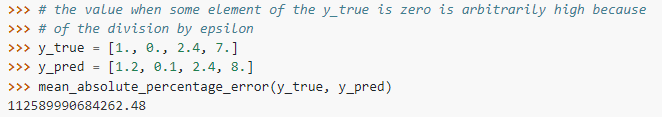







Використовувати RMSE замість MSE можна для більшої наочності, оскільки RMSE дає похибку не в квадратних умовних одиницях, як MSE, а в звичайних, що краще для розуміння похибки моделі. Але на порівняння моделей це не впливає

In [ ]:
import numpy as np

X = data.to_numpy()
X = np.c_[np.ones(X.shape[0]), X]
Y = target.to_numpy().reshape(-1, 1)
print(X.shape, Y.shape)

(1466458, 62) (1466458, 1)


In [ ]:
X_train = X[0:1300000]
Y_train = Y[0:1300000]
X_test = X[1300000:1466458]
Y_test = Y[1300000:1466458]

Лінійна регресія

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, Y_train)
print('R2 train:', reg.score(X_train, Y_train))
print('R2 test:', reg.score(X_test, Y_test))

predictions_train = reg.predict(X_train)
print('MSE train:', mean_squared_error(Y_train, predictions_train))
predictions_test = reg.predict(X_test)
print('MSE test:', mean_squared_error(Y_test, predictions_test))

R2 train: 0.7946114820696641
R2 test: 0.7887827901729874
MSE train: 1.0696234469258301
MSE test: 1.044228248938451


GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, Y_train.reshape(-1,))
print('R2 train:', reg.score(X_train, Y_train.reshape(-1, 1)))
print('R2 test:', reg.score(X_test, Y_test.reshape(-1, 1)))

predictions_train = reg.predict(X_train)
print('MSE train:', mean_squared_error(Y_train, predictions_train))
predictions_test = reg.predict(X_test)
print('MSE test:', mean_squared_error(Y_test, predictions_test))

R2 train: 0.85129787171578
R2 test: 0.7853088836255031
MSE train: 0.7744117569148786
MSE test: 1.0614027554761822


##Тренування моделі з додавання квадратів кожної колонки

Зробимо додаткові колонки: квадрат кожної колонки, наявної в датасеті

In [ ]:
data_squared = data ** 2

squared_columns = []

for col in data.columns:
  squared_columns.append(col + '_square')

data_squared.columns = squared_columns

data_ext = pd.concat([data, data_squared], axis = 1)
data_ext

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,media_source,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,install_date_year,install_date_month,install_date_day,total_sessions_day0_square,total_sessions_day1_square,total_sessions_day3_square,total_sessions_day7_square,chapters_finished_day0_square,chapters_finished_day1_square,chapters_finished_day3_square,chapters_finished_day7_square,chapters_opened_day0_square,chapters_opened_day1_square,chapters_opened_day3_square,chapters_opened_day7_square,chapters_closed_day0_square,chapters_closed_day1_square,chapters_closed_day3_square,chapters_closed_day7_square,diamonds_received_day0_square,diamonds_received_day1_square,diamonds_received_day3_square,diamonds_received_day7_square,diamonds_spent_day0_square,diamonds_spent_day1_square,diamonds_spent_day3_square,diamonds_spent_day7_square,tickets_spent_day0_square,tickets_spent_day1_square,tickets_spent_day3_square,tickets_spent_day7_square,retained_day1_square,retained_day3_square,retained_day7_square,chapters_finished_session1_square,chapters_finished_session3_square,chapters_finished_session9_square,chapters_opened_session1_square,chapters_opened_session3_square,chapters_opened_session9_square,chapters_closed_session1_square,chapters_closed_session3_square,chapters_closed_session9_square,diamonds_spent_session1_square,diamonds_spent_session3_square,diamonds_spent_session9_square,tickets_spent_session1_square,tickets_spent_session3_square,tickets_spent_session9_square,app_sub_ltv_day0_square,app_sub_ltv_day1_square,app_sub_ltv_day3_square,app_iap_ltv_day0_square,app_iap_ltv_day1_square,app_iap_ltv_day3_square,media_source_square,country_code_square,ad_ltv_day0_square,ad_ltv_day1_square,ad_ltv_day3_square,platform_square,install_date_year_square,install_date_month_square,install_date_day_square
0,1.0,1.0,1.0,1.0,0,0,0,0,1,1,1,1,0,0,0,0,20,20,20,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,16,98,0.000000,0.000000,0.000000,1,2021,12,11,1.0,1.0,1.0,1.0,0,0,0,0,1,1,1,1,0,0,0,0,400,400,400,400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,256,9604,0.000000,0.000000,0.000000,1,4084441,144,121
1,1.0,1.0,1.0,1.0,1,1,1,1,2,2,2,2,0,0,0,0,22,22,22,22,17,17,17,17,1,1,1,1,0,0,0,1,1,1,2,2,2,0,0,0,17,17,17,1,1,1,0.0,0.0,0.0,0.000000,0.000000,0.000000,18,35,0.000000,0.000000,0.000000,0,2021,12,28,1.0,1.0,1.0,1.0,1,1,1,1,4,4,4,4,0,0,0,0,484,484,484,484,289,289,289,289,1,1,1,1,0,0,0,1,1,1,4,4,4,0,0,0,289,289,289,1,1,1,0.0,0.0,0.0,0.000000,0.000000,0.000000,324,1225,0.000000,0.000000,0.000000,0,4084441,144,784
2,1.0,1.0,1.0,1.0,1,1,1,1,2,2,2,2,0,0,0,0,22,22,22,22,12,12,12,12,1,1,1,1,0,0,0,1,1,1,2,2,2,0,0,0,12,12,12,1,1,1,0.0,0.0,0.0,0.000000,0.000000,0.000000,16,63,0.000000,0.000000,0.000000,1,2022,1,27,1.0,1.0,1.0,1.0,1,1,1,1,4,4,4,4,0,0,0,0,484,484,484,484,144,144,144,144,1,1,1,1,0,0,0,1,1,1,4,4,4,0,0,0,144,144,

In [ ]:
X_ext = data_ext.to_numpy()
X_ext = np.c_[np.ones(X_ext.shape[0]), X_ext]
Y_ext = target.to_numpy().reshape(-1, 1)

X_train_ext = X_ext[0:1300000]
Y_train_ext = Y_ext[0:1300000]
X_test_ext = X_ext[1300000:1466458]
Y_test_ext = Y_ext[1300000:1466458]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train_ext, Y_train_ext)

print('R2 train:', reg.score(X_train_ext, Y_train_ext))
print('R2 test:', reg.score(X_test_ext, Y_test_ext))

predictions_train = reg.predict(X_train_ext)
print('MSE train:', mean_squared_error(Y_train_ext, predictions_train))
predictions_test = reg.predict(X_test_ext)
print('MSE test:', mean_squared_error(Y_test_ext, predictions_test))


R2 train: 0.808554781494046
R2 test: 0.7982154358980408
MSE train: 0.9970094559290946
MSE test: 0.9975945719932989


Маємо, що хоча GradientBoostingRegressor має більший коефіцієнт детермінації на тренувальному датасеті, він не робастний і його MSE на тестових даних більшу, ніж лінійна модель з додаванням квадратичних колонок(остання модель).

Тому доцільно використовувати саме останнюю модель для прогнозу прибутку. Також, її коефіцієнти легше описати і пояснити